In [76]:
#Importing Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

In [77]:
!pip install tflearn

In [78]:
import tflearn.datasets.oxflower17 as oxflower17
train_x, train_y = oxflower17.load_data(one_hot=True)

In [79]:
dic = {0: 'Daffodil', 1: 'Snowdrop', 2: 'Daisy', 3: 'ColtsFoot', 4: 'Dandelion', \
       5: 'Cowslip', 6: 'Buttercup', 7: 'Windflower', 8: 'Pansy', 9:'LilyValley', \
       10: 'Bluebell', 11: 'Crocus', 12: 'Iris', 13: 'Tigerlily', 14:'Tulip', \
       15: 'Fritillary', 16: 'Sunflower'}

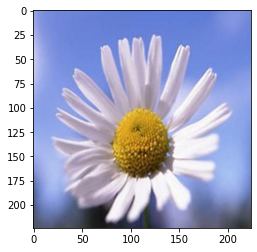

In [80]:
plt.imshow(train_x[3])

In [81]:
train_y[3]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
dic[train_y.argmax(1)[3]]

'Daisy'

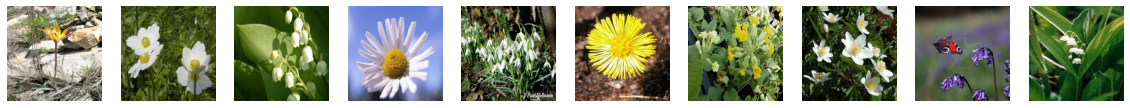

['Tulip',
 'Windflower',
 'LilyValley',
 'Daisy',
 'Snowdrop',
 'ColtsFoot',
 'Cowslip',
 'Windflower',
 'Bluebell',
 'LilyValley']

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_x[i])
  plt.axis('off')
list=[]
plt.show()

for i in range(10):
  list.append(dic[train_y.argmax(1)[i]])
list

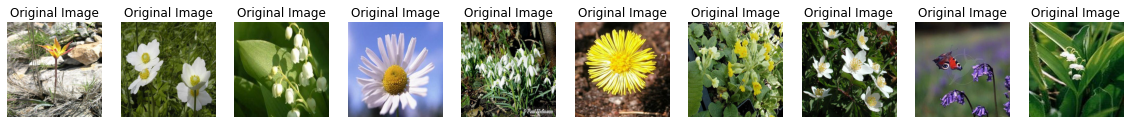

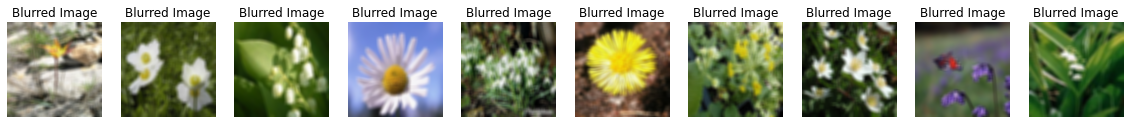

In [84]:
plt.figure(figsize=(20,30))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_x[i])
  plt.axis('off')
  plt.title("Original Image")
  
  

plt.figure(figsize=(20,30))

for i in range(10):
  plt.subplot(1,10,i+1)
  blur_img = cv2.blur(train_x[i],(10,10))
  plt.imshow(blur_img)
  plt.axis('off')
  plt.title("Blurred Image")
  
plt.show()


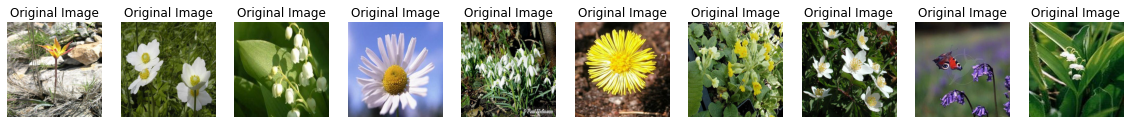

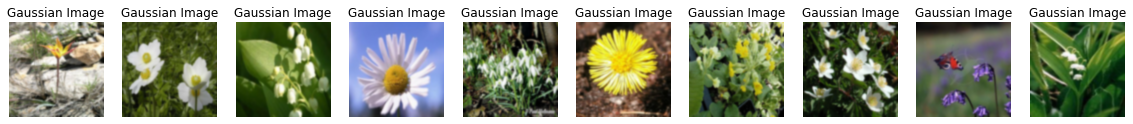

In [85]:
plt.figure(figsize=(20,30))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_x[i])
  plt.axis('off')
  plt.title("Original Image")
  
  

plt.figure(figsize=(20,30))

for i in range(10):
  plt.subplot(1,10,i+1)
  gaussian_blur = cv2.GaussianBlur(train_x[i], (9,9), 0)
  plt.imshow(gaussian_blur)
  plt.axis('off')
  plt.title("Gaussian Image")
  
plt.show()

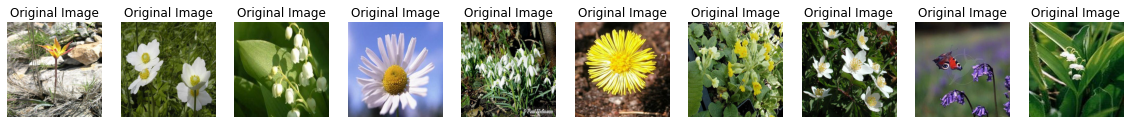

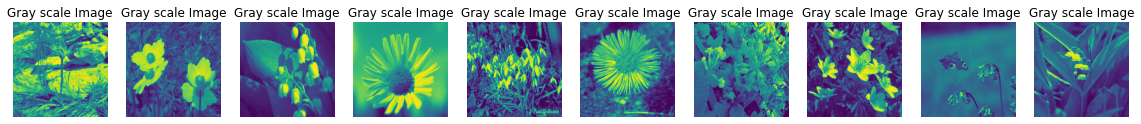

In [86]:
plt.figure(figsize=(20,30))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_x[i])
  plt.axis('off')
  plt.title("Original Image")
  
  

plt.figure(figsize=(20,30))

for i in range(10):
  plt.subplot(1,10,i+1)
  gray_img = cv2.cvtColor(train_x[i],cv2.COLOR_BGR2GRAY)
  plt.imshow(gray_img)
  plt.axis('off')
  plt.title("Gray scale Image")

plt.show()

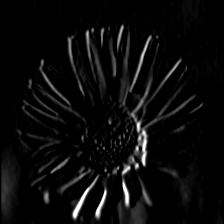

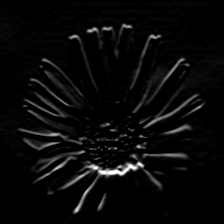

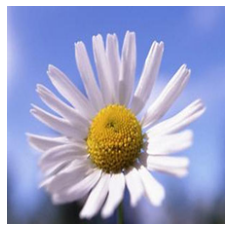

In [87]:
# Read the original image
img = train_x[3]
# Display original image
plt.imshow(train_x[3])
plt.axis('off')
cv2.waitKey(0)
print()

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
#img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=7) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=7) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=7) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2.waitKey(0)
print()
cv2_imshow(sobely)
cv2.waitKey(0)
print()

In [88]:
print(train_x.shape)

(1360, 224, 224, 3)


In [89]:
print(train_x[0][0:5][0:2])

[[[0.5882353  0.5529412  0.4862745 ]
  [0.5529412  0.5176471  0.4509804 ]
  [0.5176471  0.4862745  0.41568628]
  ...
  [0.5294118  0.54901963 0.4627451 ]
  [0.5254902  0.5137255  0.45490196]
  [0.45882353 0.4392157  0.3882353 ]]

 [[0.54509807 0.52156866 0.44705883]
  [0.52156866 0.49803922 0.42745098]
  [0.49803922 0.4745098  0.40392157]
  ...
  [0.46666667 0.48235294 0.40784314]
  [0.5372549  0.5372549  0.47843137]
  [0.5254902  0.5254902  0.4745098 ]]]


In [90]:
print(train_y[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [91]:
print(train_x.shape)
train_y.shape

(1360, 224, 224, 3)


(1360, 17)

In [92]:
activation="relu"

In [93]:
tensorflow.keras.backend.clear_session() 

model = Sequential()
model.add(Conv2D(filters=96, activation=activation, input_shape=(224,224,3),\
  kernel_size=(11,11), strides=(4,4), padding='valid', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')) 
model.add(BatchNormalization()) 


model.add(Conv2D(filters=256, activation=activation, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization()) 

model.add(Conv2D(filters=384, activation=activation, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(BatchNormalization()) 

model.add(Conv2D(filters=384, activation=activation, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(BatchNormalization()) 

model.add(Conv2D(filters=256, activation=activation, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())   

model.add(Flatten())

model.add(Dense(4000, activation=activation, input_shape=(224*224*3,), kernel_initializer = 'he_uniform'))
model.add(Dropout(0.25))
model.add(BatchNormalization())   

model.add(Dense(2000, activation=activation, kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())   

model.add(Dense(1000, activation=activation, kernel_initializer = 'he_uniform' ))
model.add(Dropout(0.25))
model.add(BatchNormalization()) 

model.add(Dense(1000, activation=activation, kernel_initializer = 'he_uniform' ))
model.add(Dropout(0.25))
model.add(BatchNormalization()) 

model.add(Dense(500, activation=activation, kernel_initializer = 'he_uniform' ))
model.add(Dropout(0.25))
model.add(BatchNormalization()) 

model.add(Dense(17, activation='softmax'))
          

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [95]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
model.fit(train_x, train_y, batch_size=20, epochs=100, verbose=1, validation_split=0.1, shuffle=True)

Train on 1224 samples, validate on 136 samples
Epoch 1/100
1224/1224 [==============================] - ETA: 0s - loss: 3.0285 - acc: 0.1765

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1224/1224 [==============================] - 3s 2ms/sample - loss: 3.0285 - acc: 0.1765 - val_loss: 44.1951 - val_acc: 0.1176
Epoch 2/100
1224/1224 [==============================] - 2s 2ms/sample - loss: 2.4916 - acc: 0.2222 - val_loss: 9.1485 - val_acc: 0.1985
Epoch 3/100
1224/1224 [==============================] - 2s 2ms/sample - loss: 2.4079 - acc: 0.2533 - val_loss: 8.4660 - val_acc: 0.1765
Epoch 4/100
1224/1224 [==============================] - 2s 2ms/sample - loss: 2.5067 - acc: 0.2271 - val_loss: 5.7449 - val_acc: 0.1250
Epoch 5/100
1224/1224 [==============================] - 2s 2ms/sample - loss: 2.3490 - acc: 0.2443 - val_loss: 3.8539 - val_acc: 0.1912
Epoch 6/100
1224/1224 [==============================] - 2s 2ms/sample - loss: 2.1849 - acc: 0.3039 - val_loss: 2.4145 - val_acc: 0.3456
Epoch 7/100
1224/1224 [==============================] - 2s 2ms/sample - loss: 2.0803 - acc: 0.3333 - val_loss: 1.8836 - val_acc: 0.4338
Epoch 8/100
1224/1224 [=============================

In [97]:
from tensorflow.keras.applications import VGG16
tensorflow.keras.backend.clear_session() 

vgg_conv = VGG16(weights= 'imagenet', include_top=False, input_shape=(224, 224, 3)) 

x = vgg_conv.output
x = MaxPooling2D()(x)

x = tensorflow.keras.layers.Flatten()(x)   
x = Dense(1024, activation='relu' )(x)
predictions = Dense(17, activation='softmax')(x)     

transfer_model = tensorflow.keras.models.Model(inputs=vgg_conv.input, outputs=predictions)   # Final model is composed of base model with the dense layer (predictions) above it


for layer in vgg_conv.layers:                      
    layer.trainable = False

transfer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [98]:
transfer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
transfer_model.fit(train_x, train_y, batch_size=20, epochs=10, verbose=1, validation_split=0.1, shuffle=True)

Train on 1224 samples, validate on 136 samples
Epoch 1/10
1220/1224 [============================>.] - ETA: 0s - loss: 1.9478 - acc: 0.5484

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1224/1224 [==============================] - 8s 6ms/sample - loss: 1.9425 - acc: 0.5498 - val_loss: 0.9259 - val_acc: 0.6912
Epoch 2/10
1224/1224 [==============================] - 8s 6ms/sample - loss: 0.3447 - acc: 0.9060 - val_loss: 0.4559 - val_acc: 0.8750
Epoch 3/10
1224/1224 [==============================] - 8s 6ms/sample - loss: 0.1294 - acc: 0.9739 - val_loss: 0.4411 - val_acc: 0.8676
Epoch 4/10
1224/1224 [==============================] - 8s 6ms/sample - loss: 0.0494 - acc: 0.9935 - val_loss: 0.3617 - val_acc: 0.8971
Epoch 5/10
1224/1224 [==============================] - 8s 6ms/sample - loss: 0.0206 - acc: 1.0000 - val_loss: 0.3436 - val_acc: 0.8897
Epoch 6/10
1224/1224 [==============================] - 8s 6ms/sample - loss: 0.0120 - acc: 1.0000 - val_loss: 0.3430 - val_acc: 0.9044
Epoch 7/10
1224/1224 [==============================] - 8s 6ms/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 0.3291 - val_acc: 0.9118
Epoch 8/10
1224/1224 [==============================] - 8s 

# Compare the results from the above 2 steps along with your detailed observations

From the above two models it is obvious that the pre trained model with VGG16 architecture and imagenet weights performed better. It had a good validation accuracy in less epoch. But both the model above shows overfitting which has to be handled by changing hyperparameters by trying out Dropouts or trying to feed the model with much more data by using image augmentation techniques.

# Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

After deploying the data in the production, to ensure that the model works for production data, I would conduct a two sample test and if the null hypothesis holds (that is no difference between the two datasets) then the data will be fed to model to make a prediction. Else, the model has to be tuned or analysed with the new data. 